In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load Data from .txt files in the same folder as Python script
def load_txt(filename):
    file_path = os.path.join(os.getcwd(), filename)
    df = pd.read_csv(file_path, sep="\t", comment='!', low_memory=False)
    return df

# Load all datasets
file_names = ['GSE113513_series_matrix.txt', 'GSE44861_series_matrix.txt', 'GSE20916_series_matrix.txt']
datasets = {name: load_txt(name) for name in file_names}

In [3]:
# Step 2: Preprocess Data (remove nulls, normalize)
def preprocess_data(df):
    df.dropna(inplace=True)
    df = df.set_index(df.columns[0])  # Set gene names as index
    df = df.apply(pd.to_numeric, errors='coerce')
    df = (df - df.mean()) / df.std()  # Normalize
    return df

processed_data = {name: preprocess_data(df) for name, df in datasets.items()}

In [4]:
# Step 3: Feature Selection (Random Forest for ranking)
def feature_selection(X, y):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    return feature_importances.sort_values(ascending=False)

# Simulated labels (for demonstration; use real labels)
labels = np.random.randint(0, 2, size=processed_data['GSE113513_series_matrix.txt'].shape[0])
important_genes = feature_selection(processed_data['GSE113513_series_matrix.txt'], labels)

In [5]:
# Step 4: Model Training & Validation
X_train, X_test, y_train, y_test = train_test_split(processed_data['GSE113513_series_matrix.txt'], labels, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [6]:
# Step 5: Evaluate Model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.5014677598947261
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      4966
           1       0.50      0.48      0.49      4913

    accuracy                           0.50      9879
   macro avg       0.50      0.50      0.50      9879
weighted avg       0.50      0.50      0.50      9879



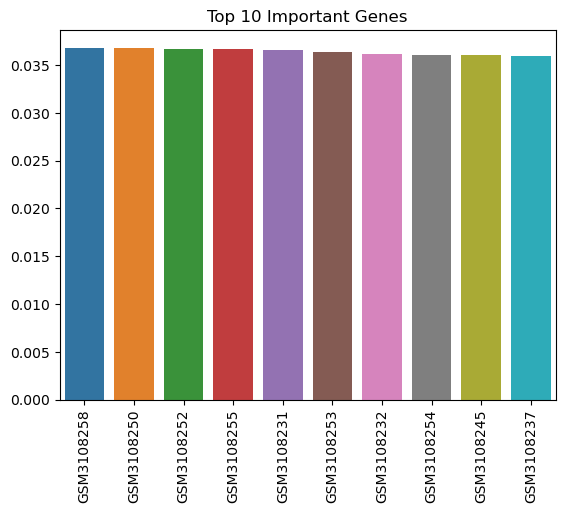

In [7]:
# Step 6: Plot important genes
sns.barplot(x=important_genes[:10].index, y=important_genes[:10].values)
plt.title('Top 10 Important Genes')
plt.xticks(rotation=90)
plt.show()